In [1]:
pwd

'C:\\Users\\Carsten\\OneDrive\\Skrivebord\\Semester 4 - BI\\Assignment 1\\MP1-Data-Wrangling\\CSV'

In [2]:
!pip install xlrd
!pip install plotly

In [3]:
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics

In [4]:
# read the CSV file from your data folder into a data frame
df = pd.read_csv ('../data/TB_Burden_Country.csv', index_col=None, na_values=['NA'])

In [5]:
df.shape

(5120, 47)

In [6]:
df.columns

Index(['Country or territory name', 'ISO 2-character country/territory code',
       'ISO 3-character country/territory code',
       'ISO numeric country/territory code', 'Region', 'Year',
       'Estimated total population number',
       'Estimated prevalence of TB (all forms) per 100 000 population',
       'Estimated prevalence of TB (all forms) per 100 000 population, low bound',
       'Estimated prevalence of TB (all forms) per 100 000 population, high bound',
       'Estimated prevalence of TB (all forms)',
       'Estimated prevalence of TB (all forms), low bound',
       'Estimated prevalence of TB (all forms), high bound',
       'Method to derive prevalence estimates',
       'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound',
       '

In [7]:
# see the first 10 records
df_sorted = df.sort_values(by='Estimated prevalence of TB (all forms) per 100 000 population', ascending=False)
df_sorted.head(10)

,Country or territory name,ISO 2-character country/territory code,ISO 3-character country/territory code,ISO numeric country/territory code,Region,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",...,Estimated incidence of TB cases who are HIV-positive per 100 000 population,"Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound","Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound",Estimated incidence of TB cases who are HIV-positive,"Estimated incidence of TB cases who are HIV-positive, low bound","Estimated incidence of TB cases who are HIV-positive, high bound",Method to derive TBHIV estimates,"Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"
552,Bhutan,BT,BTN,64,SEA,1990,535738,1762.0,827.0,3038.0,...,0.04,0.04,0.05,0.23,0.21,0.25,NaN,28.0,26.0,30.0
920,Central African Republic,CF,CAF,140,AFR,1994,3200633,1736.0,804.0,3013.0,...,455.00,323.00,501.00,15000.00,10000.00,16000.00,NaN,NaN,NaN,NaN
919,Central African Republic,CF,CAF,140,AFR,1993,3125144,1736.0,796.0,3027.0,...,383.00,271.00,409.00,12000.00,8500.00,13000.00,NaN,NaN,NaN,NaN
320,Azerbaijan,AZ,AZE,31,EUR,1998,7984460,1725.0,778.0,3035.0,...,0.73,0.65,0.81,59.00,52.00,64.00,NaN,8.1,7.8,8.8
918,Central African Republic,CF,CAF,140,AFR,1992,3050789,1714.0,786.0,2989.0,...,311.00,216.00,332.00,9500.00,6600.00,10000.00,NaN,NaN,NaN,NaN
319,Azerbaijan,AZ,AZE,31,EUR,1997,7921745,1701.0,765.0,2996.0,...,0.48,0.42,0.53,38.00,33.00,42.00,NaN,8.3,7.7,9.0
321,Azerbaijan,AZ,AZE,31,EUR,1999,8047936,1696.0,763.0,2987.0,...,1.10,0.98,1.20,88.00,78.00,97.00,NaN,8.1,7.7,8.9
921,Central African Republic,CF,CAF,140,AFR,1995,3275695,1686.0,777.0,2935.0,...,521.00,365.00,582.00,17000.00,12000.00,19000.00,NaN,8.5,7.8,9.3
917,Central African Republic,CF,CAF,140,AFR,1991,2979588,1679.0,767.0,2934.0,...,245.00,166.00,264.00,7300.00,5000.00,7900.00,NaN,7.4,6.6,7.8
825,Cambodia,KH,KHM,116,WPR,1995,10769198,1667.0,1224.0,2177.0,...,24.00,14.00,28.00,2600.00,1600.00,3000.00,NaN,24.0,21.0,26.0


In [8]:
df.isnull().sum()

Country or territory name                                                                            0
ISO 2-character country/territory code                                                              24
ISO 3-character country/territory code                                                               0
ISO numeric country/territory code                                                                   0
Region                                                                                               0
Year                                                                                                 0
Estimated total population number                                                                    0
Estimated prevalence of TB (all forms) per 100 000 population                                        0
Estimated prevalence of TB (all forms) per 100 000 population, low bound                            20
Estimated prevalence of TB (all forms) per 100 000 population, high bound

In [9]:
print(df.columns)

Index(['Country or territory name', 'ISO 2-character country/territory code',
       'ISO 3-character country/territory code',
       'ISO numeric country/territory code', 'Region', 'Year',
       'Estimated total population number',
       'Estimated prevalence of TB (all forms) per 100 000 population',
       'Estimated prevalence of TB (all forms) per 100 000 population, low bound',
       'Estimated prevalence of TB (all forms) per 100 000 population, high bound',
       'Estimated prevalence of TB (all forms)',
       'Estimated prevalence of TB (all forms), low bound',
       'Estimated prevalence of TB (all forms), high bound',
       'Method to derive prevalence estimates',
       'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound',
       '

In [10]:
columns_to_drop = [

    'Estimated mortality of TB cases who are HIV-positive, per 100 000 population, high bound',
    'Estimated number of deaths from TB in people who are HIV-positive, low bound',
    'Estimated number of deaths from TB in people who are HIV-positive, high bound',
    'Estimated number of incident cases (all forms), low bound',
    'Estimated number of incident cases (all forms), high bound',
    'Estimated HIV in incident TB (percent), low bound',
    'Estimated HIV in incident TB (percent), high bound',
    'Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound',
    'Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound',
    'Estimated incidence of TB cases who are HIV-positive, low bound',
    'Estimated incidence of TB cases who are HIV-positive, high bound',
    'Case detection rate (all forms), percent, low bound',
    'Case detection rate (all forms), percent, high bound',
    'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound',
    'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound',
    'Estimated number of deaths from TB (all forms, excluding HIV), low bound',
    'Estimated number of deaths from TB (all forms, excluding HIV), high bound',
    'Estimated mortality of TB cases who are HIV-positive, per 100 000 population, low bound',
    'Estimated incidence (all forms) per 100 000 population, low bound',
    'Estimated incidence (all forms) per 100 000 population, high bound',
    'Estimated prevalence of TB (all forms) per 100 000 population, low bound',
    'Estimated prevalence of TB (all forms) per 100 000 population, high bound',
    'Estimated prevalence of TB (all forms), low bound',
    'Estimated prevalence of TB (all forms), high bound'
]

df = df.drop(columns_to_drop, axis=1)

In [11]:
df.count()

Country or territory name                                                            5120
ISO 2-character country/territory code                                               5096
ISO 3-character country/territory code                                               5120
ISO numeric country/territory code                                                   5120
Region                                                                               5120
Year                                                                                 5120
Estimated total population number                                                    5120
Estimated prevalence of TB (all forms) per 100 000 population                        5120
Estimated prevalence of TB (all forms)                                               5120
Method to derive prevalence estimates                                                5120
Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population    5120
Estimated 

In [12]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
# Sort the DataFrame by 'Country or territory name' and 'Year', then keep the latest year for each country
latest_data = df.sort_values(by=['Country or territory name', 'Year'], ignore_index=True).groupby('Country or territory name').tail(1)

In [13]:
# Display all countries sorted by Estimated prevalence of TB
sorted_by_prevalence = latest_data.sort_values(by='Estimated prevalence of TB (all forms) per 100 000 population', ascending=False)

In [14]:
# Top 50 lande af Estimeret forkomst af TB per 100.000 indbyggere
sorted_by_prevalence.head(50)

,Country or territory name,ISO 2-character country/territory code,ISO 3-character country/territory code,ISO numeric country/territory code,Region,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,Estimated prevalence of TB (all forms),Method to derive prevalence estimates,...,Estimated number of deaths from TB in people who are HIV-positive,Method to derive mortality estimates,Estimated incidence (all forms) per 100 000 population,Estimated number of incident cases (all forms),Method to derive incidence estimates,Estimated HIV in incident TB (percent),Estimated incidence of TB cases who are HIV-positive per 100 000 population,Estimated incidence of TB cases who are HIV-positive,Method to derive TBHIV estimates,"Case detection rate (all forms), percent"
4339,Swaziland,SZ,SWZ,748,AFR,2013-01-01,1249514,945.0,12000.0,predicted,...,5000.0,Indirect,1382.0,17000.0,NaN,75.00,1038.00,13000.0,NaN,38.0
1399,Djibouti,DJ,DJI,262,EMR,2013-01-01,872932,906.0,7900.0,predicted,...,120.0,Indirect,619.0,5400.0,NaN,7.20,45.00,390.0,NaN,58.0
4495,Timor-Leste,TL,TLS,626,SEA,2013-01-01,1132879,802.0,9100.0,predicted,...,0.0,Indirect,498.0,5600.0,NaN,NaN,NaN,NaN,NaN,67.0
2431,Kiribati,KI,KIR,296,WPR,2013-01-01,102351,748.0,770.0,predicted,...,0.0,VR imputed,497.0,510.0,NaN,NaN,NaN,NaN,NaN,80.0
4216,South Africa,ZA,ZAF,710,AFR,2013-01-01,52776130,715.0,380000.0,predicted,...,64000.0,Indirect,860.0,450000.0,NaN,61.00,520.00,270000.0,NaN,69.0
843,Cambodia,KH,KHM,116,WPR,2013-01-01,15135169,715.0,110000.0,survey imputed,...,590.0,Indirect,400.0,61000.0,Prevalence,3.90,15.00,2300.0,NaN,62.0
3112,Namibia,NaN,NAM,516,AFR,2013-01-01,2303315,651.0,15000.0,predicted,...,2100.0,Indirect,651.0,15000.0,Mortality,51.00,333.00,7700.0,NaN,64.0
2575,Lesotho,LS,LSO,426,AFR,2013-01-01,2074465,613.0,13000.0,predicted,...,5200.0,Indirect,916.0,19000.0,NaN,79.00,703.00,15000.0,NaN,50.0
1735,Gabon,GA,GAB,266,AFR,2013-01-01,1671711,578.0,9700.0,predicted,...,180.0,Indirect,423.0,7100.0,Mortality,11.00,47.00,790.0,NaN,73.0
3064,Mozambique,MZ,MOZ,508,AFR,2013-01-01,25833752,559.0,140000.0,predicted,...,38000.0,Indirect,552.0,140000.0,NaN,57.00,312.00,81000.0,NaN,37.0


In [15]:
# Group by region and aggregate data for each region
aggregated_data_by_region = latest_data.groupby('Region').agg({
    'Estimated total population number': 'sum',
    'Estimated prevalence of TB (all forms) per 100 000 population': 'mean',  # You can use sum or other aggregation functions
    'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population':'mean',
    'Estimated mortality of TB cases who are HIV-positive, per 100 000 population':'mean',
    # Add other columns you want to aggregate
}).reset_index()

# Round the aggregated values to two decimals
aggregated_data_by_region = aggregated_data_by_region.round(2)

# Sort the DataFrame by 'Estimated prevalence of TB (all forms) per 100 000 population' in descending order
sorted_by_prevalence_by_region = aggregated_data_by_region.sort_values(by='Estimated prevalence of TB (all forms) per 100 000 population', ascending=False)

In [16]:
# Top 6 regions af Estimeret forkomst af TB per 100.000 indbyggere
sorted_by_prevalence_by_region.head(6)

,Region,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population","Estimated mortality of TB cases who are HIV-positive, per 100 000 population"
4,SEA,1855067723,310.18,27.92,1.53
0,AFR,927370706,291.13,30.53,37.22
5,WPR,1858410405,163.10,11.16,0.62
2,EMR,616906419,134.50,13.99,1.02
3,EUR,917690998,50.78,3.40,0.28
1,AMR,971022432,40.99,3.05,0.76


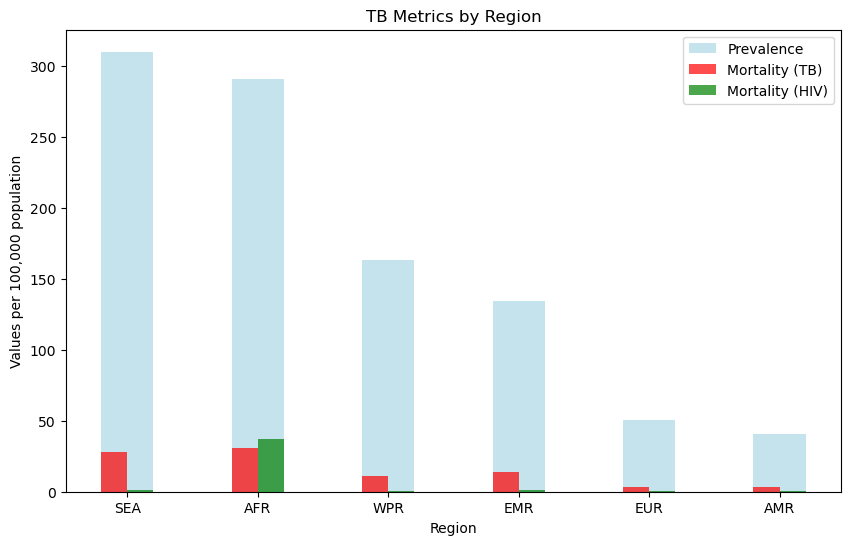

In [17]:
# Sample data (replace this with your actual data)
regions = sorted_by_prevalence_by_region['Region']
prevalence_data = sorted_by_prevalence_by_region['Estimated prevalence of TB (all forms) per 100 000 population']
mortality_data = sorted_by_prevalence_by_region['Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population']
hiv_mortality_data = sorted_by_prevalence_by_region['Estimated mortality of TB cases who are HIV-positive, per 100 000 population']

# Bar chart settings
bar_width = 0.4
opacity = 0.7

# Plotting the bars
fig, ax = plt.subplots(figsize=(10, 6))

# Transparent lightblue bar for Estimated prevalence of TB
rects1 = ax.bar(regions, prevalence_data, bar_width, alpha=opacity, color='lightblue', label='Prevalence')

# Calculate positions for the red and green bars (half the size of light blue bar)
bar_positions = [np.arange(len(regions)) - bar_width / 4, np.arange(len(regions)) + bar_width / 4]

# Red bar for Estimated mortality of TB cases (excluding HIV)
rects2 = ax.bar(bar_positions[0], mortality_data, bar_width / 2, alpha=opacity, color='red', label='Mortality (TB)')

# Green bar for Estimated mortality of TB cases with HIV
rects3 = ax.bar(bar_positions[1], hiv_mortality_data, bar_width / 2, alpha=opacity, color='green', label='Mortality (HIV)')

# Adding labels
ax.set_xlabel('Region')
ax.set_ylabel('Values per 100,000 population')
ax.set_title('TB Metrics by Region')
ax.legend()

# Display the plot
plt.show()